<a href="https://colab.research.google.com/github/LoowdY/LSTM_AAPL/blob/main/Treinamento_LSTM_APPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Modelagem Preditiva com LSTM para Séries Temporais Financeiras

---
**Autor:** João Renan S. Lopes   

---

## Objetivo

Este projeto tem como finalidade a implementação de um modelo preditivo baseado em Redes Neurais Recorrentes, especificamente Long Short-Term Memory (LSTM), aplicado a séries temporais financeiras reais. O foco está na obtenção de previsões altamente precisas, com ênfase em rigor estatístico, validação robusta e boas práticas de engenharia de modelos.

---

## Componentes do Projeto

- **Aquisição de Dados:** Coleta automática de séries históricas através da API do Yahoo Finance.
- **Pré-processamento:**
  - Suavização da série original (média móvel central)
  - Decomposição da série (componente de tendência)
  - Normalização com MinMaxScaler
- **Modelagem com LSTM:**
  - Arquitetura multi-camada otimizada
  - Camadas de Dropout ajustadas para mitigação de overfitting
  - Função de perda Huber Loss para robustez contra outliers
- **Validação e Avaliação:**
  - Divisão em conjunto de treino e teste
  - Métricas aplicadas: RMSE, MAE, R² Score
  - Visualização das previsões vs. valores reais

---

## Tecnologias Utilizadas

- Python (NumPy, Pandas, Matplotlib, Scikit-learn)
- TensorFlow / Keras
- Statsmodels
- Yahoo Finance API

---

## Resultados Esperados

Obter previsões de curto a médio prazo com alta acurácia, possibilitando a aplicação do modelo em ambientes de suporte à decisão financeira.

---

## Observações Finais

Este projeto pode ser expandido para incorporar:
- Otimização bayesiana de hiperparâmetros
- Integração com indicadores técnicos (MACD, RSI)
- Cenários de multi-séries com múltiplas entradas

---



In [ ]:
# Instalação dos pacotes necessários
!pip install yfinance statsmodels tensorflow --quiet

# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 601.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00


### Caso não consiga fazer o download dos dados por meio da API do Yahoo Finance devido limite de requisições, baixe os dados disponibilizados no classroom em csv e importe o arquivo no célula abaixo.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-1c173dfff1f5>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  serie_suave = serie.rolling(window=5, center=True).mean().fillna(method='bfill').fillna(method='ffill')
<ipython-input-5-1c173dfff1f5>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tendencia = decomp.trend.fillna(method='bfill').fillna(method='ffill')


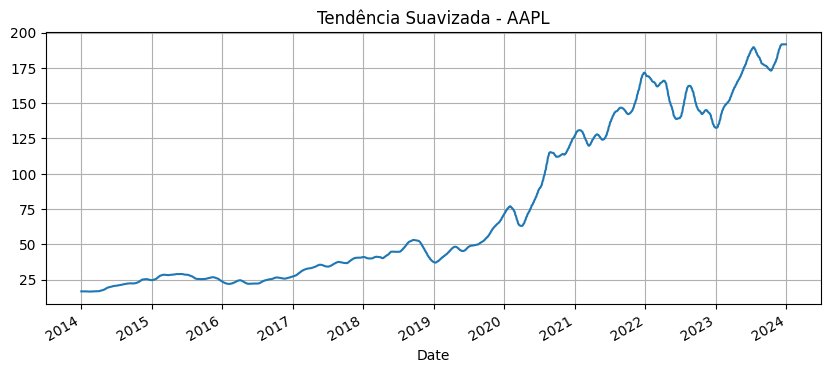

In [ ]:

dados = yf.download('AAPL', start='2014-01-01', end='2024-01-01')
serie = dados['Close'].dropna()
serie_suave = serie.rolling(window=5, center=True).mean().fillna(method='bfill').fillna(method='ffill')

decomp = seasonal_decompose(serie_suave, model='additive', period=30)
tendencia = decomp.trend.fillna(method='bfill').fillna(method='ffill')

tendencia.plot(title="Tendência Suavizada - AAPL", figsize=(10,4))
plt.grid(True)
plt.show()


In [ ]:

scaler = MinMaxScaler()
serie_norm = scaler.fit_transform(tendencia.values.reshape(-1, 1))

def criar_janelas(dados, passos=90):
    X, y = [], []
    for i in range(len(dados) - passos):
        X.append(dados[i:i+passos])
        y.append(dados[i+passos])
    return np.array(X), np.array(y)

X, y = criar_janelas(serie_norm, passos=90)
X_treino, X_teste = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_treino, y_teste = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]


In [ ]:
modelo = Sequential()
modelo.add(LSTM(128, return_sequences=True, input_shape=(X_treino.shape[1], 1)))
modelo.add(Dropout(0.25))
modelo.add(LSTM(64, return_sequences=False))
modelo.add(Dropout(0.2))
modelo.add(Dense(1))

modelo.compile(optimizer='adam', loss='huber')
modelo.fit(X_treino, y_treino, epochs=80, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 2/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 3.2102e-04 - val_loss: 1.1714e-04
Epoch 3/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 2.7259e-04 - val_loss: 3.0241e-04
Epoch 4/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 2.5268e-04 - val_loss: 6.0343e-04
Epoch 5/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 2.0532e-04 - val_loss: 4.9080e-04
Epoch 6/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 1.7239e-04 - val_loss: 0.0021
Epoch 7/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 3.1099e-04 - val_loss: 8.2205e-04
Epoch 8/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 1.6419e-04 - val_loss: 0.0014
Epoch 9/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 1.4911e-04 - val_loss: 1.5926e-04
Epoch 10/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 1.6884e-04 - val_loss: 3.9463e-05
Epoch 11/80
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 1.9236e-04 - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


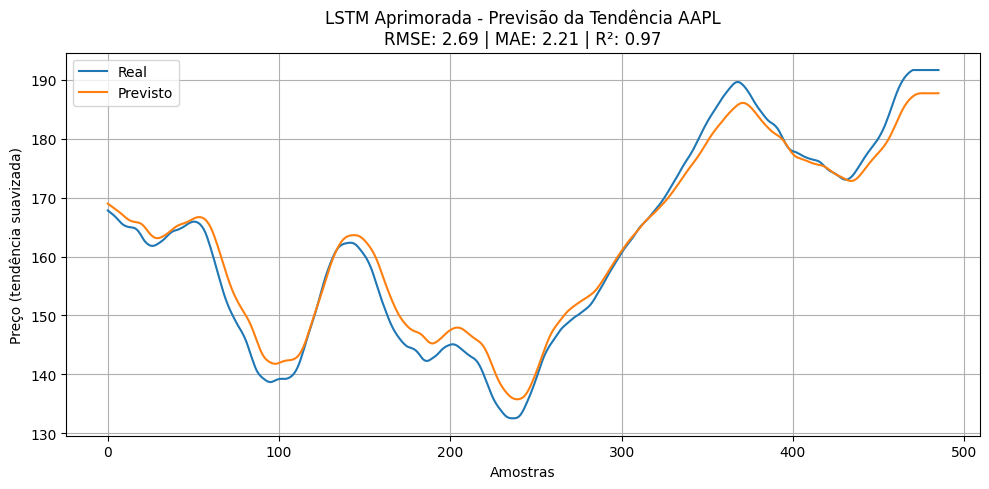

In [ ]:

y_pred = modelo.predict(X_teste)
y_pred_inv = scaler.inverse_transform(y_pred)
y_teste_inv = scaler.inverse_transform(y_teste)

rmse = np.sqrt(mean_squared_error(y_teste_inv, y_pred_inv))
mae = mean_absolute_error(y_teste_inv, y_pred_inv)
r2 = r2_score(y_teste_inv, y_pred_inv)

plt.figure(figsize=(10, 5))
plt.plot(y_teste_inv, label='Real')
plt.plot(y_pred_inv, label='Previsto')
plt.title(f'LSTM Aprimorada - Previsão da Tendência AAPL\nRMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.2f}')
plt.xlabel('Amostras')
plt.ylabel('Preço (tendência suavizada)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
